In [ ]:
import pandas as pd
import gzip

def get_vcf_names(vcf_path):
    with gzip.open(vcf_path, "rt") as ifile:
        for line in ifile:
            if line.startswith("#CHROM"):
                vcf_names = [x.strip() for x in line.split('\t')]
                break
    ifile.close()
    return vcf_names

def read_vcf_chunk(fn,chunksize=10):
    names = get_vcf_names(fn)
    try:
        vcf = pd.read_csv(fn, compression='gzip', comment='#', chunksize=chunksize, delim_whitespace=True, header=None, names=names)
    except:
        vcf = pd.read_csv(fn, comment='#', chunksize=chunksize, delim_whitespace=True, header=None, names=names)
    df= pd.DataFrame(vcf.get_chunk(chunksize))
    return df

def read_anno_chunk(fn,chunksize=10):
    try:
        vcf = pd.read_csv(fn, compression='gzip', chunksize=chunksize)
    except:
        vcf = pd.read_csv(fn, chunksize=chunksize)
    df= pd.DataFrame(vcf.get_chunk(chunksize))
    return df

# 1.read fam

In [ ]:
fam = pd.read_csv('data/nodp_fam.csv',header=None,names=['fid','iid','fathid','mothid','sex','ad','vcf'])

### 1.1 Normal family

In [ ]:
fam[fam.fid.isin(['22_1','1036','28_9'])].iloc[:,:-1].sort_values('fid').to_csv('data/mwe_normal_fam.csv',header=False,index=False,sep='\t')

In [ ]:
tmp = pd.DataFrame([pd.Series(list(set(fam.fid))),pd.Series([sum(fam[fam.fid == i].vcf) for i in set(fam.fid)]),pd.Series([sum(fam.fid == i) for i in set(fam.fid)])])

In [ ]:
tmp = tmp.T

In [ ]:
tmp.columns = ['fid','vcf','tol']

In [ ]:
tmp['per'] = tmp.vcf/tmp.tol

In [ ]:
tmp.sort_values('per')

,fid,vcf,tol,per
37,4_649,2,373,0.005362
36,535,1,62,0.016129
761,8_64024,1,43,0.023256
734,10R_R81,1,43,0.023256
115,4_715,1,41,0.02439
...,...,...,...,...
264,1999,6,9,0.666667
225,22_1,5,7,0.714286
735,1036,5,7,0.714286
3,28_9,8,11,0.727273


### 1.2 Multi-group family

In [ ]:
fam[fam.fid.isin(['27_104'])].iloc[:,:-1].sort_values('fid').to_csv('data/mwe_multi_group_fam.csv',header=False,index=False,sep='\t')

### 1.3 In-law family 

In [ ]:
fam[fam.fid.isin(['4_461'])].iloc[:,:-1].sort_values('fid').to_csv('data/mwe_in_law_fam.csv',header=False,index=False,sep='\t')

# 2.read vcf and annotation

In [ ]:
vcf = read_vcf_chunk('/mnt/mfs/statgen/alzheimers-family/linkage_files/geno/full_sample/vcf/full_sample.vcf.gz', chunksize=1000)

In [ ]:
vcf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,4_364_99,...,8_64039_20,8_64039_25,8_64039_3,25_6_107C,25_22_491C,26_EGH_EGH64401,26_SW_SW27020,10R_R111_16,10R_R114_16,10R_R114_20
0,1,10140,chr1:10140:ACCCTAAC:A,ACCCTAAC,A,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1,1,10146,chr1:10146:AC:A,AC,A,.,.,PR,GT,0/0,...,0/0,0/0,0/1,0/0,0/0,0/0,0/1,0/0,1/1,0/1
2,1,10146,chr1:10146:ACC:*,ACC,*,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
3,1,10150,chr1:10150:CT:C,CT,C,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,./.,0/0
4,1,10172,chr1:10172:CCCTAA:C,CCCTAA,C,.,.,PR,GT,./.,...,0/0,0/0,0/0,0/0,0/0,0/0,./.,0/0,./.,./.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,66479,chr1:66479:TATTTATAG:*,TATTTATAG,*,.,.,PR,GT,0/0,...,./.,0/0,./.,./.,0/0,0/0,0/0,0/0,0/0,0/0
996,1,66480,chr1:66480:AT:A,AT,A,.,.,PR,GT,0/0,...,./.,0/0,./.,./.,0/0,0/0,0/0,0/0,0/0,0/0
997,1,66480,chr1:66480:ATTT:*,ATTT,*,.,.,PR,GT,0/0,...,./.,0/0,./.,./.,0/0,0/0,0/0,0/0,0/0,0/0
998,1,66481,chr1:66481:TTTATAGA:*,TTTATAGA,*,.,.,PR,GT,0/0,...,./.,0/0,./.,./.,0/0,0/0,./.,0/0,0/0,./.


# 2.1merge vcf and annotation

In [ ]:
import numpy as np

In [ ]:
anno = read_anno_chunk('/home/yl4604/project/alzheimers-family/SMMAT/20210802/annotation/EFIGA_NIALOAD_chr1.hg38.hg38_multianno.csv',chunksize=1000)

In [ ]:
af = anno.AF

In [ ]:
af = af.replace('.',0.00001).astype(np.float64)

<AxesSubplot:>

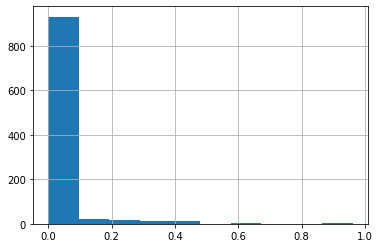

In [ ]:
af.hist()

In [ ]:
vcf.INFO = ['AF='+str(i) for i in af]

In [ ]:
vcf.to_csv('data/fisrt1000snp_full_samples.vcf.gz',compression='gzip',sep='\t',header=True,index=False)